In [1]:
import warnings
warnings.filterwarnings('ignore')

from module_data_info import data_module_chl, biomes_module
from module_data_locations import *
from module_data_load import load_data, load_ensemble, load_biomes
from module_data_preprocessing import * 
from module_data_postprocessing import * 
from module_global_averages import * 
from module_metrics import *
from module_plot_lines import *
from module_plot_maps  import *
from module_plot_bars  import plot_bars

In [ ]:
# print(dir_forecasts_tos)
print(dir_observations_tos)
# print(dir_assimilations_tos)


In [12]:
dir_observations_tos = "/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/tos/observation/ERSST_v5_tos_1900-2022_1x1.nc"
obs_in = load_data(dir_observations_tos, 'tos')

In [154]:
dir_assim_tos = "/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/tos/assimilation/tos_Omon_ensmebles_195801_202012_1x1_LE.nc"
asm_in = load_data(dir_assim_tos, 'tos', ensemble_mean=True) 

loading data..
done


In [9]:
dir_simulations_tos = "/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/tos/simulation/CanESM5/tos_Omon_ensmebles_195001_202512_1x1_LE.nc"
sim_in = load_data(dir_simulations_tos, 'tos', ensemble_mean=False).sel(ensembles  ='r1i1p2f1') 

loading data..
done


In [12]:

def Enso(tos):
    ds = tos.where((tos.lat >= -5) & (tos.lat <= 5), drop = True)
    ds = ds.where((ds.lon >= -170) & (ds.lon <= -120), drop = True)
    ds = ds.mean(['lat','lon'])

    y0 = ds.year.values[0]
    y1 = ds.year.values[-1]

    i, r = np.divmod(y0, 5)
    i = i if r == 0 else i+1

    base = ds.sel(year = slice(i * 5 + 1, None))
    clim  = [base[i : i +30,...] for i in range(0, len(base.sel(year = slice(None, 1991)).year), 5)]
    clim = xr.concat([xr.concat([ds.mean('year').assign_coords(year = ds.year.values[0] + 14 + ind) for ind in range(5)], dim = 'year') for ds in clim], dim = 'year')
    ext = xr.concat([clim[-1].assign_coords(year = yr ) for yr in range(clim.year.values[-1]+1, y1+1 ) ], dim = 'year')
    clim = xr.concat([clim, ext], dim = 'year')
    
    ONI_anoms = (ds - clim)
    ONI = ONI_anoms.stack(ref = ('year','time') ).rolling(ref =3, center = True).mean().unstack()
    return ONI



In [13]:
# Enso(obs_in).to_netcdf('ERSST_v5_ONI_1915-2021.nc')
# ens_obs = Enso(obs_in).sel(year = slice(1990,2020)).stack( ref = ('year','time'))
# ens_obs = ens_obs.assign_coords(ref = ens_obs.year + ens_obs.time/12)

# Enso(asm_in).to_netcdf('CanESM5_assim_ONI_1975-2020.nc')
# ens_assm = Enso(asm_in).sel(year = slice(1990,2020)).stack( ref = ('year','time'))
# ens_assm = ens_assm.assign_coords(ref = ens_assm.year+ ens_assm.time/12)


Enso(sim_in).to_netcdf('CanESM5_sim_r1i1p2f1_ONI_1950-2025.nc')
ens_sim = Enso(sim_in).sel(year = slice(1990,2020)).stack( ref = ('year','time'))
ens_sim = ens_sim.assign_coords(ref = ens_sim.year+ ens_sim.time/12)

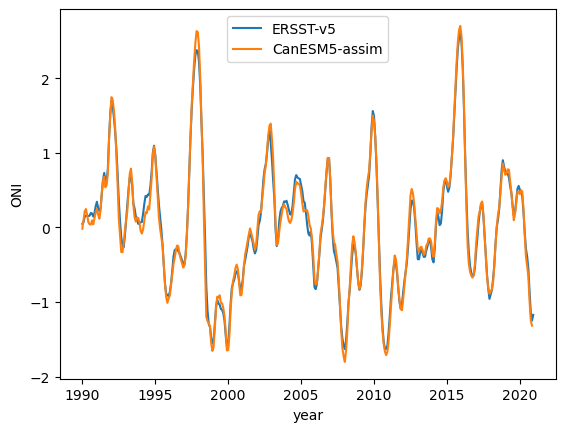

: 

In [173]:
ens_obs.plot(label = 'ERSST-v5')
ens_assm.plot(label = 'CanESM5-assim')

plt.ylabel('ONI')
plt.xlabel('year')
plt.legend()

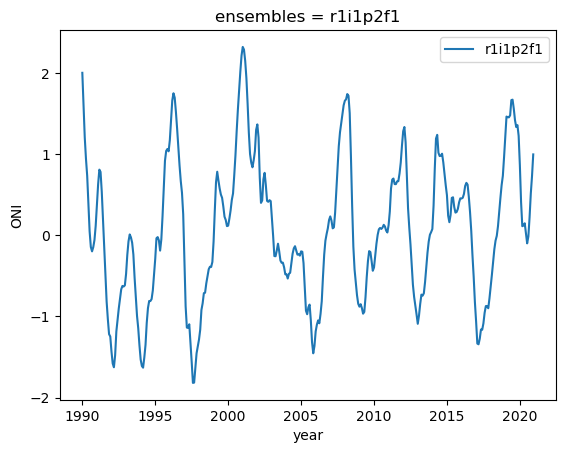

In [14]:
ens_sim.plot(label = 'r1i1p2f1')

plt.ylabel('ONI')
plt.xlabel('year')
plt.legend()